# San Francisco Housing Rental Analysis

In this assignment, you will perform basic analysis for the San Francisco Housing Market to allow potential real estate investors to choose rental investment properties. 

In [241]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
from pathlib import Path
from dotenv import load_dotenv

%matplotlib inline

In [253]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")


## Load Data

In [98]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function. 

Hint: Use the Pandas groupby function

Optional challenge: Use the min, max, and std to scale the y limits of the chart.

In [99]:
# Calculate the mean number of housing units per year (hint: use groupby) 
# YOUR CODE HERE!
sfo_grouped= sfo_data.groupby('year').sum()
sfo_grouped.head

<bound method NDFrame.head of       sale_price_sqr_foot  housing_units  gross_rent
year                                                
2010         21791.316846       21981040       73101
2011         20172.302322       22095913       90270
2012         23164.618170       21834332      134792
2013         27081.617039       21568857      169347
2014         33376.636407       22820880      211680
2015         34789.719362       22173110      216862
2016         31393.966910       17675132      201940>

In [112]:
fig_housing_units=sfo_grouped['housing_units']
fig_housing_units.head

<bound method NDFrame.head of year
2010    21981040
2011    22095913
2012    21834332
2013    21568857
2014    22820880
2015    22173110
2016    17675132
Name: housing_units, dtype: int64>

In [122]:
sfo_grouped.tail()

,sale_price_sqr_foot,housing_units,gross_rent
year,,,
2012,23164.618170,21834332,134792
2013,27081.617039,21568857,169347
2014,33376.636407,22820880,211680
2015,34789.719362,22173110,216862
2016,31393.966910,17675132,201940


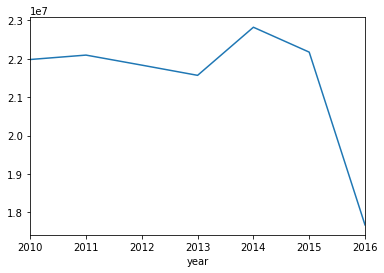

In [102]:
sfo_housing.plot()

(20000000, 24000000)

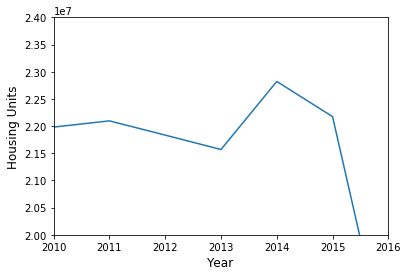

In [119]:
plot_housing_units = fig_housing_units.plot()
plot_housing_units.set_xlabel("Year", fontsize=12)
plot_housing_units.set_ylabel("Housing Units", fontsize=12)
plot_housing_units.set_ylim(20000000, 24000000)

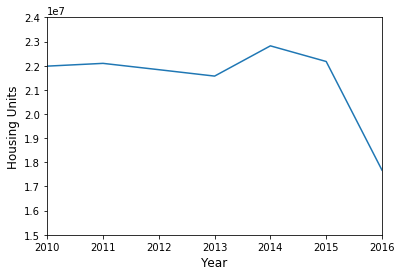

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [147]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
# YOUR CODE HERE!

# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
# YOUR CODE HERE!

plot_housing_units = fig_housing_units.plot()
plot_housing_units.set_xlabel("Year", fontsize=12)
plot_housing_units.set_ylabel("Housing Units", fontsize=12)
plot_housing_units.set_ylim(15000000, 24000000)

plt.show()
plt.close(fig_housing_units)

- - - 

## Average Prices per Square Foot

In this section, you will calculate the average gross rent and average sales price for each year. Plot the results as a line chart.

### Average Gross Rent in San Francisco Per Year

In [279]:
# Calculate the average gross rent and average sale price per square foot
# YOUR CODE HERE!

In [288]:
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


In [291]:
grouped_average = sfo_data.groupby([sfo_data.index,sfo_data['neighborhood']]).mean()
grouped_average.head()
grouped_average.reset_index
grouped_average.set_index

<bound method DataFrame.reset_index of                                     sale_price_sqr_foot  housing_units  \
year neighborhood                                                        
2010 Alamo Square                            291.182945         372560   
     Anza Vista                              267.932583         372560   
     Bayview                                 170.098665         372560   
     Buena Vista Park                        347.394919         372560   
     Central Richmond                        319.027623         372560   
     Central Sunset                          418.172493         372560   
     Corona Heights                          369.359338         372560   
     Cow Hollow                              569.379968         372560   
     Croker Amazon                           165.645730         372560   
     Diamond Heights                         456.930822         372560   
     Downtown                                241.804552         372560   

In [287]:
sfo_ppsqf= sfo_data.groupby('sale_price_sqr_foot')
sf_sqf = sfo_ppsqf.pd.DataFrame({'sale_price_sqr_foot', 'year'})

AttributeError: 'DataFrameGroupBy' object has no attribute 'pd'

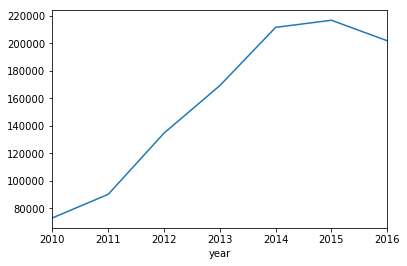

In [280]:
# Plot the Average Gross Rent per Year as a Line Chart 
# YOUR CODE HERE!
sfo_gross.plot()

### Average Sales Price per Year

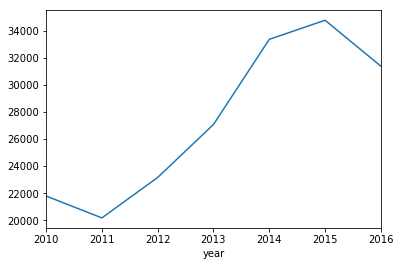

In [51]:
# Plot the Average Sales Price per Year as a line chart
# YOUR CODE HERE!
sfo_ppsqf.plot()

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.

Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [72]:
# Group by year and neighborhood and then create a new dataframe of the mean values
# YOUR CODE HERE!


In [285]:
neighborhood_df = sfo_data.groupby([sfo_data.index, "neighborhood"]).mean()
# costs_df.reset_index(inplace=True)
neighborhood_df = neighborhood_df.reset_index()
neighborhood_df.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


In [137]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
# YOUR CODE HERE!
neighborhood_df.hvplot.line("year", "sale_price_sqr_foot", groupby = "neighborhood")

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

- - - 

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [286]:
sfo_neighborhood= sfo_data.groupby('neighborhood').mean()
sfo_neighborhood.reset_index(inplace=True)
sfo_neighborhood.rename(columns={'neighborhood': 'Neighborhood'}, inplace=True)
sfo_neighborhood.head()

,Neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333


In [183]:
sorted_spsf.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
346,2015,Union Square District,2258.702832,382295,3739
388,2016,Presidio Heights,1465.968586,384242,4390
374,2016,Merced Heights,1416.666667,384242,4390
226,2013,Union Square District,1290.472107,378401,2971
262,2014,Miraloma Park,1267.766203,380348,3528


In [175]:
# Getting the data from the top 10 expensive neighborhoods
# YOUR CODE HERE!
sorted_spsf = neighborhood_df.sort_values(by=['sale_price_sqr_foot'], ascending=False)
sorted_spsf = sorted_spsf[:10]

In [176]:
most_expensive = sorted_spsf[['neighborhood', 'sale_price_sqr_foot']]
most_expensive

,neighborhood,sale_price_sqr_foot
346,Union Square District,2258.702832
388,Presidio Heights,1465.968586
374,Merced Heights,1416.666667
226,Union Square District,1290.472107
262,Miraloma Park,1267.766203
386,Parnassus/Ashbury Heights,1207.997485
382,Outer Richmond,1196.645437
323,Marina,1132.837361
282,South of Market,1119.838877
300,Corona Heights,1100.791194


In [182]:
# Plotting the data from the top 10 expensive neighborhoods
# YOUR CODE HERE!
most_expensive.hvplot.bar(x='neighborhood', y='sale_price_sqr_foot', title='Top 10 Most Expensive Neighborhooods in San Francisco',height=700, rot=45)


:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Parallel Coordinates and Parallel Categories Analysis

In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. 

Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
1. Create a Parallel Coordinates Plot
2. Create a Parallel Categories Plot

In [262]:
avg_values=neighborhood_df.drop(columns=['year']).groupby('neighborhood').mean().round(2)

In [273]:
most_expensive=sfo_neighborhood.head(10)

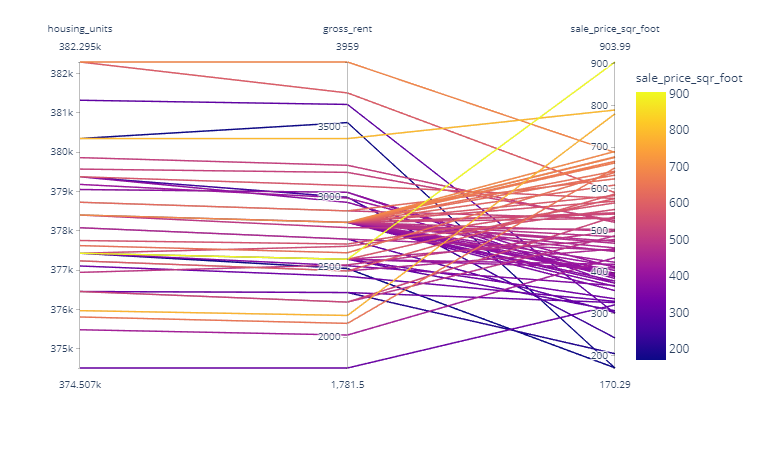

In [282]:
px.parallel_coordinates(sfo_neighborhood[['Neighborhood', 'housing_units', 'gross_rent', 'sale_price_sqr_foot']], color='sale_price_sqr_foot')

In [284]:
most_expensive.describe

<bound method NDFrame.describe of         Neighborhood  sale_price_sqr_foot  housing_units   gross_rent
0       Alamo Square           366.020712       378401.0  2817.285714
1         Anza Vista           373.382198       379050.0  3031.833333
2            Bayview           204.588623       376454.0  2318.400000
3    Bayview Heights           590.792839       382295.0  3739.000000
4    Bernal Heights            576.746488       379374.5  3080.333333
5   Buena Vista Park           452.680591       378076.5  2698.833333
6   Central Richmond           394.422399       378401.0  2817.285714
7     Central Sunset           423.687928       378401.0  2817.285714
8  Clarendon Heights           487.244886       376454.0  2250.500000
9     Corona Heights           587.539067       377232.8  2472.000000>

In [283]:
most_expensive.head()

,Neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333


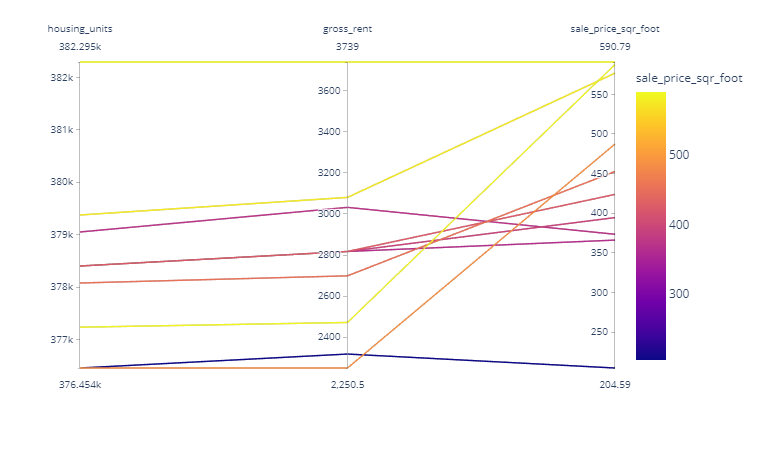

In [274]:
# Parallel Coordinates Plot
# YOUR CODE HERE!
px.parallel_coordinates(most_expensive[['Neighborhood', 'housing_units', 'gross_rent', 'sale_price_sqr_foot']], color='sale_price_sqr_foot')

In [204]:
sfo_grouped.head()

,sale_price_sqr_foot,housing_units,gross_rent
year,,,
2010,21791.316846,21981040,73101
2011,20172.302322,22095913,90270
2012,23164.618170,21834332,134792
2013,27081.617039,21568857,169347
2014,33376.636407,22820880,211680


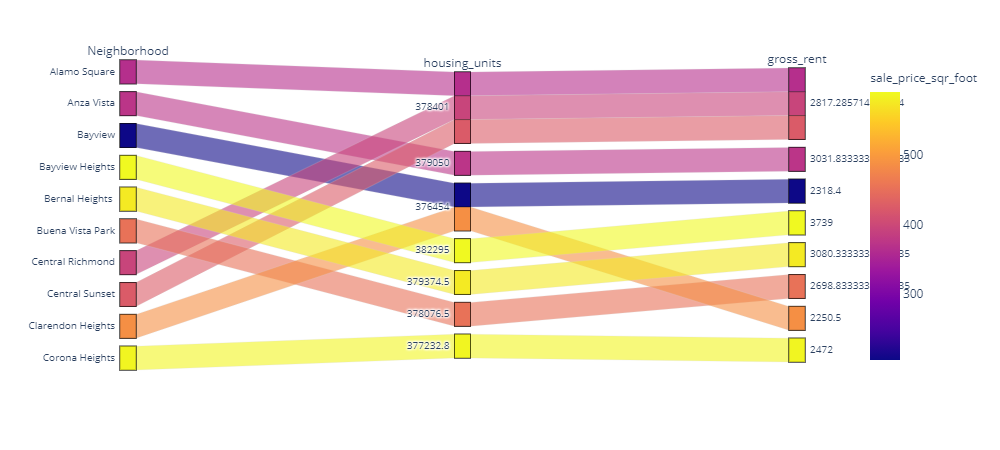

In [278]:

px.parallel_categories(most_expensive, dimensions=['Neighborhood', 'housing_units', 'gross_rent'],
                      color='sale_price_sqr_foot')

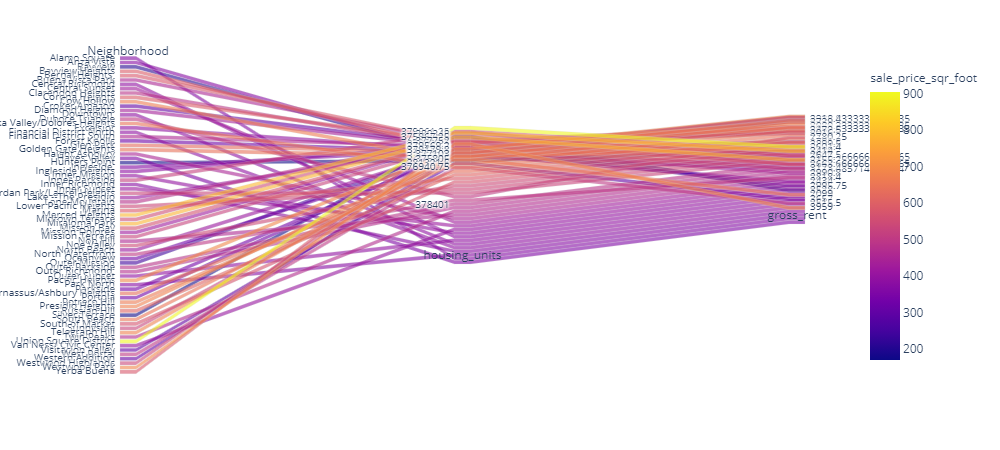

In [256]:
# Parallel Categories Plot
# YOUR CODE HERE!

px.parallel_categories(sfo_neighborhood, dimensions=['Neighborhood', 'housing_units', 'gross_rent'],
                      color='sale_price_sqr_foot')

- - - 

## Neighborhood Map

In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization. Remember, you will need your mapbox api key for this.

### Load Location Data

In [209]:
# Load neighborhoods coordinates data 
file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean prices per neighborhood

1. Calculate the mean values for each neighborhood
2. Join the average values with the neighborhood locations

In [247]:
sfo_neighborhood= sfo_data.groupby('neighborhood').mean()
sfo_neighborhood.reset_index(inplace=True)
sfo_neighborhood.rename(columns={'neighborhood': 'Neighborhood'}, inplace=True)
sfo_neighborhood.head()

,Neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333


In [220]:
# Calculate the mean values for each neighborhood
# YOUR CODE HERE!
df_neighborhood_grouped = df_neighborhood_locations.groupby('Neighborhood').mean()

df_indexed = neighborhood_df.set_index('neighborhood')

In [227]:
neighborhood_df.head(200)


,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
5,2010,Central Sunset,418.172493,372560,1239
6,2010,Corona Heights,369.359338,372560,1239
7,2010,Cow Hollow,569.379968,372560,1239
8,2010,Croker Amazon,165.645730,372560,1239
9,2010,Diamond Heights,456.930822,372560,1239


In [ ]:
sfo_neighborhood= sfo_data.groupby('neighborhood').mean()
sfo_neighborhood.reset_index(inplace=True)
sfo_neighborhood.rename(columns={'neighborhood': 'Neighborhood'}, inplace=True)
sfo_neighborhood.head()

In [248]:
# Join the average values with the neighborhood locations
# YOUR CODE HERE!
complete_df = pd.merge(sfo_neighborhood, df_neighborhood_locations, on="Neighborhood")
complete_df.head()

,Neighborhood,sale_price_sqr_foot,housing_units,gross_rent,Lat,Lon
0,Alamo Square,366.020712,378401.0,2817.285714,37.791012,-122.402100
1,Anza Vista,373.382198,379050.0,3031.833333,37.779598,-122.443451
2,Bayview,204.588623,376454.0,2318.400000,37.734670,-122.401060
3,Bayview Heights,590.792839,382295.0,3739.000000,37.728740,-122.410980
4,Buena Vista Park,452.680591,378076.5,2698.833333,37.768160,-122.439330


### Mapbox Visualization

Plot the aveage values per neighborhood with a plotly express scatter_mapbox visualization.

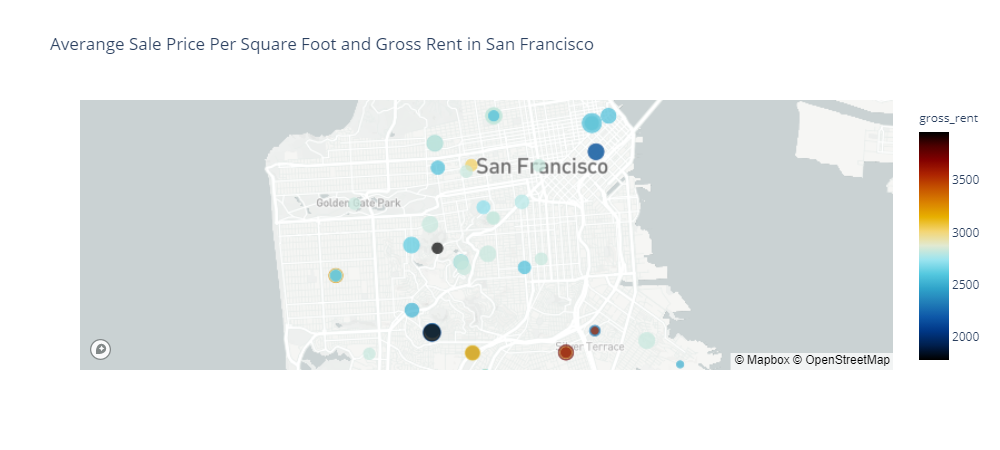

In [261]:
# Create a scatter mapbox to analyze neighborhood info
# YOUR CODE HERE!
px.set_mapbox_access_token(mapbox_token)
map = px.scatter_mapbox(
    complete_df,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    color_continuous_scale=px.colors.cyclical.IceFire,
    size_max=15,
    zoom=11,
    hover_name="Neighborhood",
    title="Averange Sale Price Per Square Foot and Gross Rent in San Francisco",
)
map.show()